# Importing Libraries :


*   **Numpy**         --> for calculation of matrices , linear algebra.
*   **Pandas**        --> For Data Manipulation and Data Analysis.
*   **Matplotlib**    --> For Data Visualization.
*   **Seaborn**       --> It is built on top of matplotlib and pandas.It has extra features when compared to matplotlib.
*   **Sklearn**       --> For statistical modelling of data and it provides selection of efficient tools for machine learning. 



In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()

# Importing dataset



*   As data is in excel format we have to use read_excel method.




In [2]:
fare_train=pd.read_excel("/content/Data_Train.xlsx")

In [3]:
#Displaying maximum columns of dataset
pd.set_option('display.max_columns',None)

In [4]:
#Displaying top 5 rows of dataset
fare_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#To get number of rows and columns
fare_train.shape

(10683, 11)

In [6]:
#Displaying information about dataset like(Dtype, Count)
fare_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Displaying statistical information of data like Mean, Median , Standarad Deviation 
fare_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
fare_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
fare_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Dropping null values
fare_train.dropna(inplace=True)

In [11]:
fare_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
#Seperating Journey_day from Data_of_Journey for easy understanding
fare_train['Journey_day']=pd.to_datetime(fare_train["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [13]:
#Seperating Journey_month from Data_of_Journey for easy understanding
fare_train['Journey_month']=pd.to_datetime(fare_train["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [14]:
fare_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# As we converted Date_of_Journey column into integers , it is better to drop
fare_train.drop(["Date_of_Journey"],axis=1,inplace=True) 

In [16]:
# As like Date_of_Journey we shall extract values from Dep_Time
#Extracting hours
fare_train["Dep_hour"] =pd.to_datetime(fare_train["Dep_Time"]).dt.hour

#Extracting minutes
fare_train["Dep_min"] =pd.to_datetime(fare_train["Dep_Time"]).dt.minute

#Dropping the Dep_Time column as we extracted values from it
fare_train.drop(["Dep_Time"],axis=1,inplace=True)




In [17]:
fare_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
# Arrival time is when the plane pulls up to the gate
#Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours
fare_train["Arrival_hour"]=pd.to_datetime(fare_train["Arrival_Time"]).dt.hour

#Extracting Minutes
fare_train["Arrival_min"]=pd.to_datetime(fare_train["Arrival_Time"]).dt.minute

#As we extracted values from Arrival_Time ,it is better to drop
fare_train.drop(["Arrival_Time"],axis=1,inplace=True) 

In [19]:
#Viewing dataset after adding columns
fare_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
#Time taken by plane to reach destination is called Duration
#It is the difference between Departure Time and Arrival Time

#Assigning and converting Duration column into list
duration =list(fare_train["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) !=2:  #Checking if duration contains only hour or mins
    if "h" in duration[i]:
      duration[i]=duration[i].strip()+" 0m" #Adds 0 minute
    else:
      duration[i]="0h "+duration[i] #Adds 0 hour


duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0])) #Extract hours from duration
  duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1])) #Extracts only minutes from

In [21]:
#Adding duration_hours and duration_mins to train_data dataframe 
fare_train["Duration_hours"]=duration_hours
fare_train["Duration_mins"]=duration_mins

In [22]:
fare_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
#As we extracted hours and minutes values from Duration column it is better to drop
fare_train.drop(["Duration"],axis=1,inplace=True) 

In [24]:
fare_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

We have many ways to handle categorical data. Some of them are


1.   **Nominal data**--> The data which is not in any order --> **OnehatEncoder** is used in this case
2.   **Ordinal data**--> The data which is in order--> **LabelEncoder** is used in this case



In [25]:
fare_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

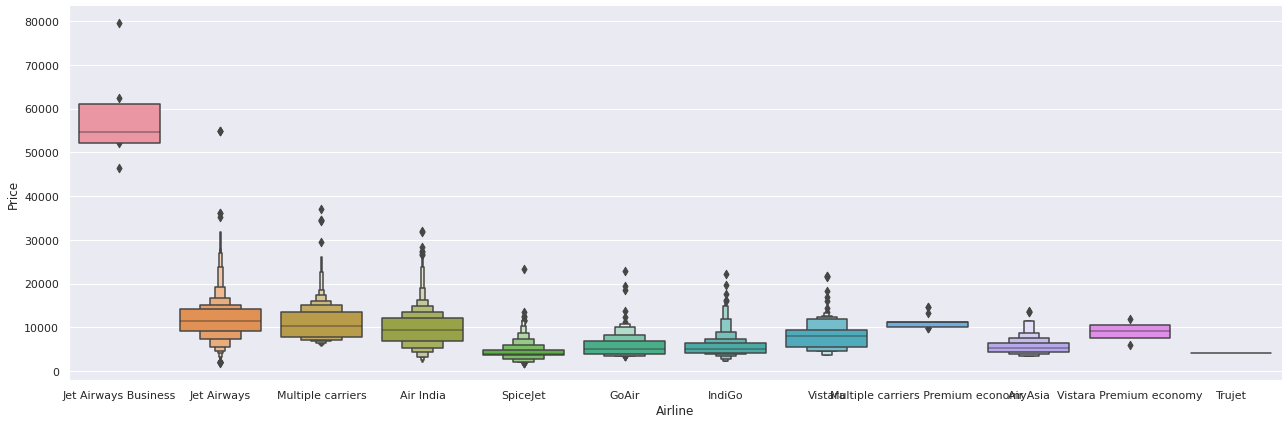

In [26]:
#Airline vs price
sns.catplot(y="Price",x="Airline",data=fare_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

# Observation



1.   Price of Jet Airways is high and the prices of remaining all are same.






In [27]:
# As Airline is nominal categorical data we will perform OneHotEncoding

Airline=fare_train[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
fare_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

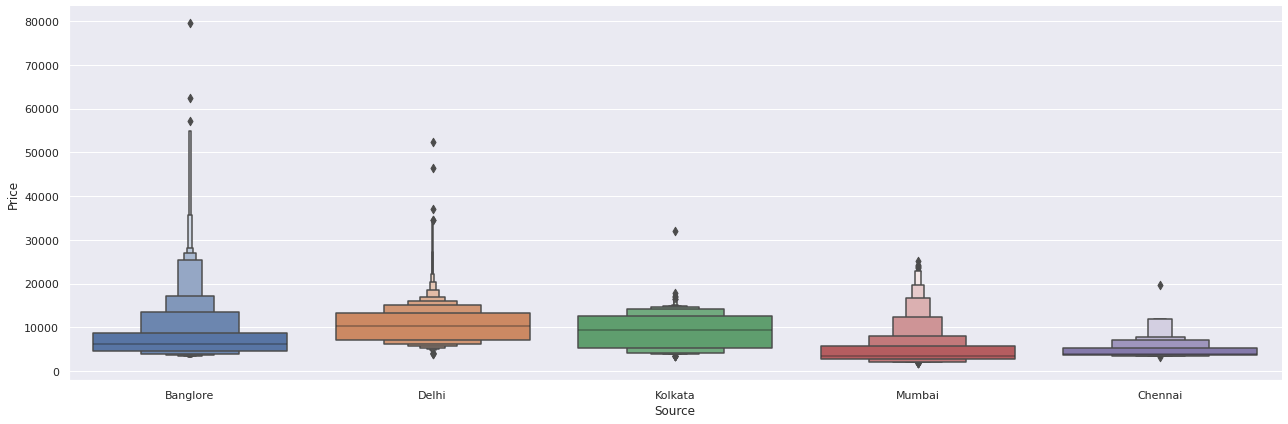

In [29]:
#Source VS Price

sns.catplot(y="Price",x="Source",data=fare_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [30]:
#As source is nominal categorical data we will perform OneHatEncoding
Source=fare_train[["Source"]]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
fare_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

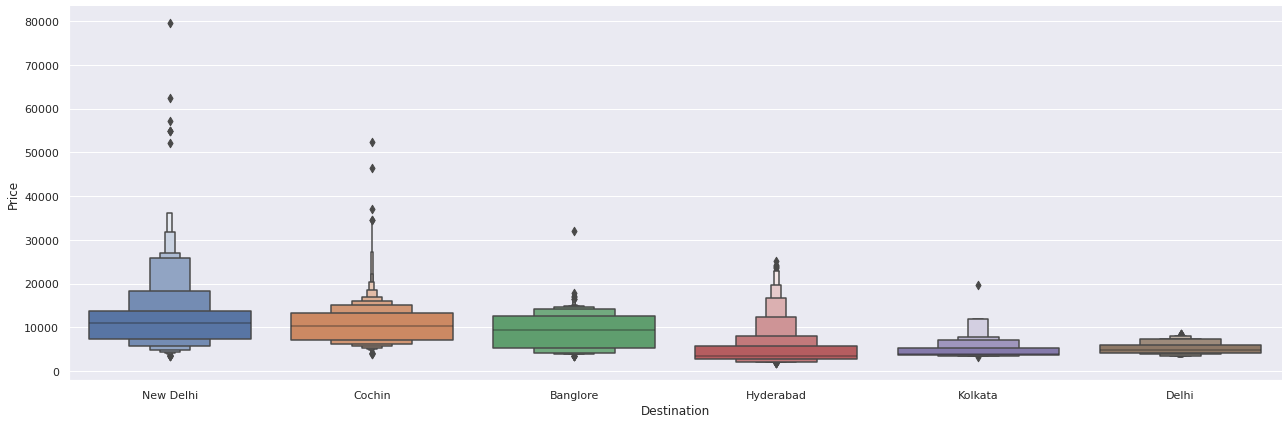

In [32]:
sns.catplot(y="Price",x="Destination",data=fare_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [33]:
#As Destination is nominal categorical data we will perform OneHatEncoding
Destination=fare_train[["Destination"]]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
fare_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
# Additional info contains almost 80% of no_info
#Route and Total_Stops are related to each other

fare_train.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [36]:
fare_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
# Total stops data is Ordinal Categorical type so we do Labelencoding
#We shall assign values to corresponding keys

fare_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [38]:
fare_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [39]:
# Concatenate dataframe--> train_data + Airline + Source + Destination

fare_train= pd.concat([fare_train,Airline,Source,Destination],axis=1)

In [40]:
fare_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
#Dropping categorical columns from data as we converted those data into numerical type
fare_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [42]:
fare_train.shape

(10682, 30)

# Test data set

In [43]:
fare_test=pd.read_excel("/content/Test_set.xlsx")

In [44]:
fare_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
# Preprocessing

print("Test data Info")
print('-'*75)
fare_test.info()

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [46]:
print("Null values:")
print('-'*75)
fare_test.dropna(inplace=True)
print(fare_test.isnull().sum())

Null values:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [47]:
# Exploratory Data Analysis
# Date_of_Journey
fare_test["Journey_day"] = pd.to_datetime(fare_test.Date_of_Journey, format="%d/%m/%Y").dt.day
fare_test["Journey_month"] = pd.to_datetime(fare_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
fare_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
fare_test["Dep_hour"] = pd.to_datetime(fare_test["Dep_Time"]).dt.hour
fare_test["Dep_min"] = pd.to_datetime(fare_test["Dep_Time"]).dt.minute
fare_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
fare_test["Arrival_hour"] = pd.to_datetime(fare_test.Arrival_Time).dt.hour
fare_test["Arrival_min"] = pd.to_datetime(fare_test.Arrival_Time).dt.minute
fare_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(fare_test["Duration"]) 

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
fare_test["Duration_hours"] = duration_hours
fare_test["Duration_mins"] = duration_mins
fare_test.drop(["Duration"], axis = 1, inplace = True)

In [48]:
# Categorical data

print("Airline")
print("-"*75)
print(fare_test["Airline"].value_counts())
Airline = pd.get_dummies(fare_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(fare_test["Source"].value_counts())
Source = pd.get_dummies(fare_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(fare_test["Destination"].value_counts())
Destination = pd.get_dummies(fare_test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
fare_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
fare_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([fare_test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [49]:
fare_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Some feature selection methods are:



1.   Heatmap
2.   Feature_importances_
3.   SelectKBest











In [50]:
fare_test.shape

(2671, 12)

In [51]:
fare_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
X=fare_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
y= fare_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [54]:
corr=fare_train.corr()

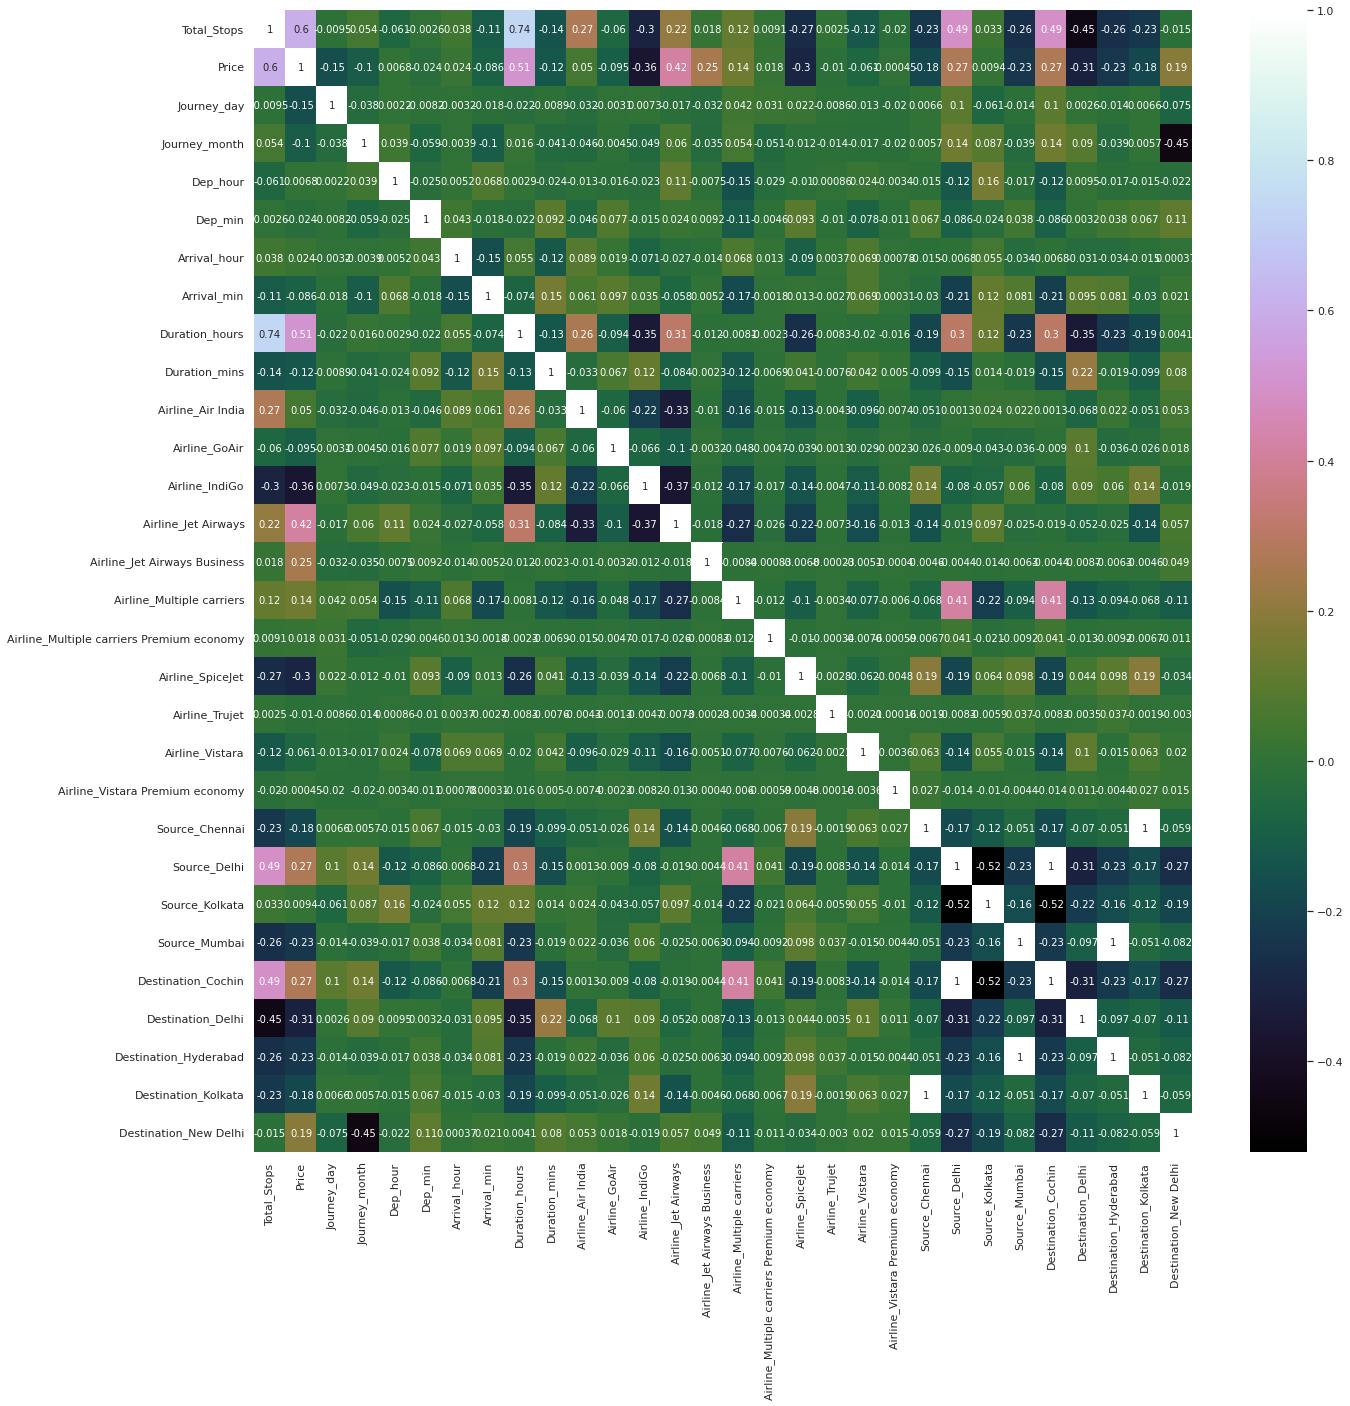

In [55]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize=(21,21))
sns.heatmap(fare_train.corr(),annot=True,cmap="cubehelix")
plt.show()


In [56]:
# Important feature using ExtraTreeRegressor
# We can know the important features

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [57]:
print(selection.feature_importances_)

[2.17385663e-01 1.42767947e-01 5.44469040e-02 2.38271567e-02
 2.12711310e-02 2.78779512e-02 1.89204178e-02 1.42535984e-01
 1.76119081e-02 9.09848383e-03 1.95822203e-03 1.64453310e-02
 1.36611987e-01 6.70946766e-02 1.94591179e-02 8.31620063e-04
 3.44337051e-03 8.92215907e-05 5.07222479e-03 7.81504942e-05
 6.11816771e-04 7.53101752e-03 2.98561708e-03 6.38785381e-03
 9.94409761e-03 1.42629352e-02 6.16332255e-03 4.20725464e-04
 2.48651456e-02]


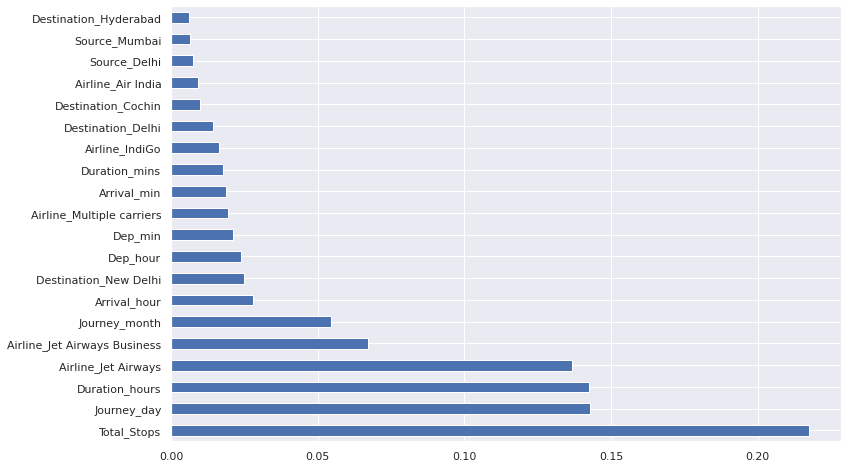

In [58]:
# Plotting the graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [59]:
#As the target column(price column) is numerical type we use regression models

# Fitting model


1.   Split the dataset into train and test set in order to prediction w.r.t X_test
2.   If needed do scaling of data
*  Scaling is not done in Random Forest




3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RMSE Score
7. Plot graph


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=45)

# Linear Regression


In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() 
reg_lr= lr.fit(X_train,y_train)
y_pred=reg_lr.predict(X_test)
print("Score of training data---------",reg_lr.score(X_train,y_train))
print("Score of testing data---------",reg_lr.score(X_test,y_test))

Score of training data--------- 0.6497355243364052
Score of testing data--------- 0.5620346640960028


# Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
reg_dt= dt.fit(X_train,y_train)
y_pred=reg_dt.predict(X_test)
print("Score of training data---------",reg_dt.score(X_train,y_train))
print("Score of testing data ---------",reg_dt.score(X_test,y_test))

Score of training data--------- 0.9750614832587993
Score of testing data --------- 0.701533978744393


# Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor 
reg_rf= RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
y_pred=reg_rf.predict(X_test)


In [65]:
reg_rf.score(X_train,y_train)

0.959927346505204

In [66]:
reg_rf.score(X_test,y_test)

0.7792969942621993

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


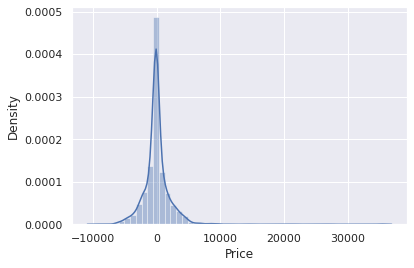

In [67]:
sns.distplot(y_test-y_pred)
plt.show()

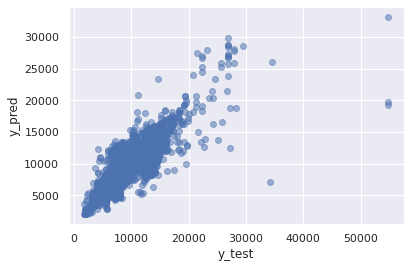

In [68]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1242.1337995211843
MSE: 4718241.478306588
RMSE: 2172.151347928267


In [71]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [72]:
metrics.r2_score(y_test, y_pred)

0.7792969942621993

# AdaBoost Regressor

In [73]:
from sklearn.ensemble import AdaBoostRegressor
adb=DecisionTreeRegressor()
reg_adb= dt.fit(X_train,y_train)
y_pred=reg_adb.predict(X_test)
print("Score of training data---------",reg_adb.score(X_train,y_train))
print("Score of testing data ---------",reg_adb.score(X_test,y_test))

Score of training data--------- 0.9750614832587993
Score of testing data --------- 0.6956454147210682


In [74]:
# Random forest gave best score among all algorithms.

# Hyper parameter Tuning


*   Choose  any of the following methods for Hyperparameter tuning


1.   **RandomizedSearchCv**-->Fast
2.   **GridSearchCV**


*   Assign hyperparameters in form of dictionary

*   Fit the model
*   Check best parameters and best score



In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=45,n_jobs=1)

In [79]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=  15.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=  15.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
#Gettting best parameters from randomized search
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [81]:
prediction =rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


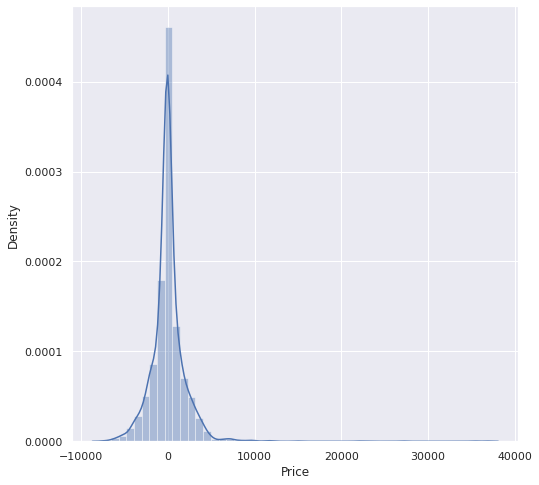

In [82]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

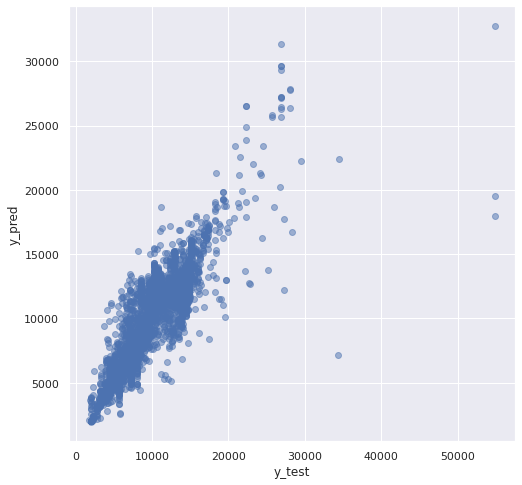

In [83]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1209.1983787691565
MSE: 4508402.813794624
RMSE: 2123.299982054967


# Saving the model to reuse again

In [85]:
import pickle
#open a file , where you want to store the data
files = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,files)

In [86]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [87]:
y_prediction=forest.predict(X_test)

In [88]:
metrics.r2_score(y_test,y_prediction)

0.7891125207016002